In [24]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Problem 5

In [60]:
colnames = ['col1', 'col2', 'col3', 'col4']
df = pd.read_csv('data0.txt', names=colnames, header=None, delimiter=' ')
df = df.drop(columns='col4')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype(int)

X shape: (48, 2)
y shape: (48,)


In [78]:
def predict(W, b, X):
    scores = X @ W.T + b
    return np.argmax(scores, axis=1)

def MultiPerceptron(X, y, lr=1.0):
    num_classes = len(np.unique(y))
    num_features = X.shape[1]
    W = np.zeros((num_classes, num_features))   
    b = np.zeros(num_classes)

    misclassified = True

    while misclassified:
        misclassified = False
        for i in range(len(X)):
            xi, yi = X[i], y[i]
            y_hat = predict(W, b, xi.reshape(1, -1))[0]
            
            if y_hat != yi: 
                W[yi] += lr * xi
                W[y_hat] -= lr * xi
                b[yi] += lr
                b[y_hat] -= lr
                misclassified=True

    return W, b

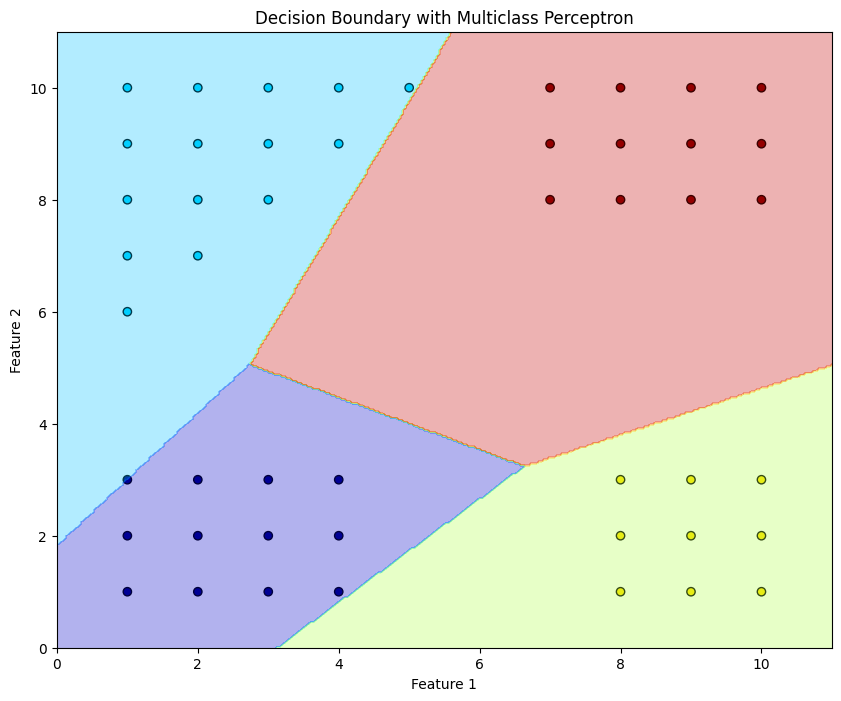

In [79]:
W, b = MultiPerceptron(X, y, lr=1.0)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, edgecolors='k')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = predict(W, b, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.jet)

plt.title('Decision Boundary with Multiclass Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Problem 6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


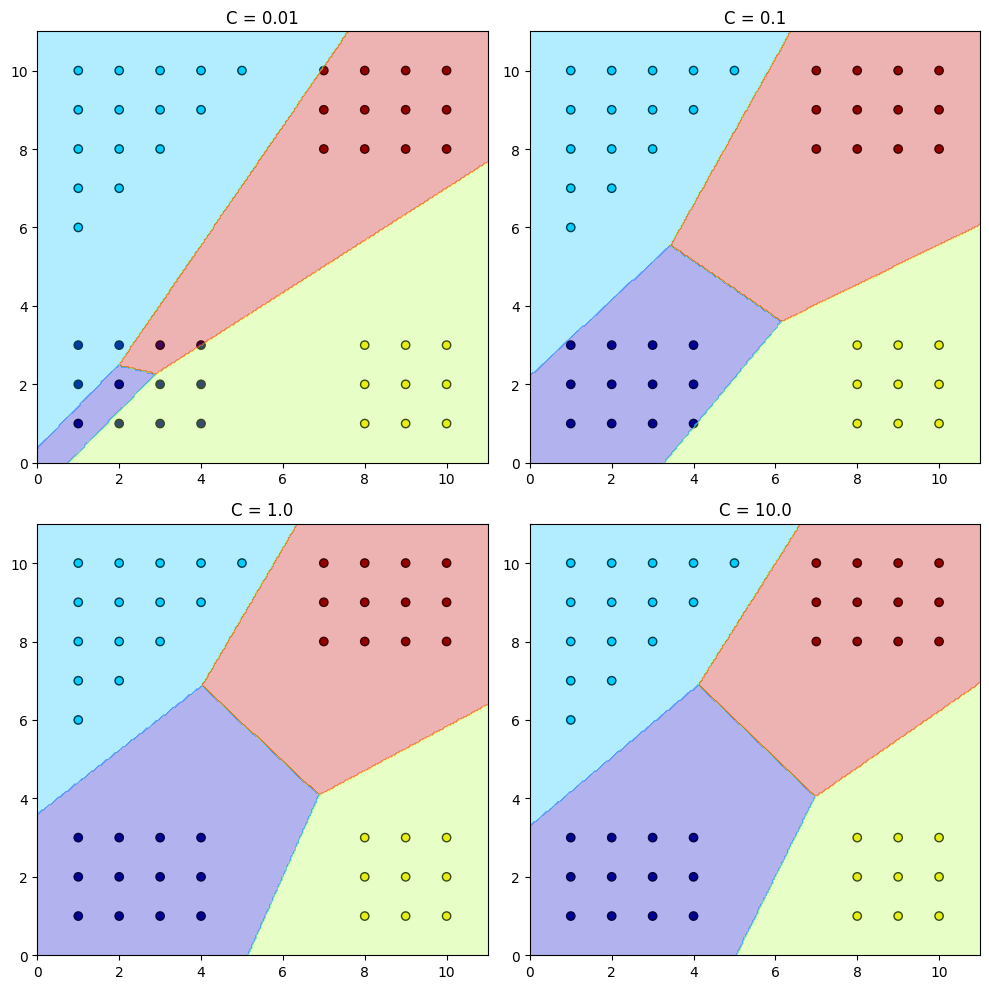

In [75]:
lin_svc = LinearSVC(loss='hinge', multi_class='crammer_singer')
c_vals = [0.01, 0.1, 1.0, 10.0]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for i, c_val in enumerate(c_vals):
    lin_svc = LinearSVC(loss='hinge', multi_class='crammer_singer', C=c_val)
    lin_svc.fit(X,y)

    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet, edgecolors='k')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                            np.linspace(y_min, y_max, 300))

    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.jet)
    axes[i].set_title(f"C = {c_val}")

plt.tight_layout()
plt.show()


## 6b

### As the value of C increases, the model performs better on the training set. However, increasing the value of C may cause overfitting and cause the model to not perform well on new data.